# F-Test to test if variances of two populations are equal

In [176]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

### Visualisation of Fisher Distribution

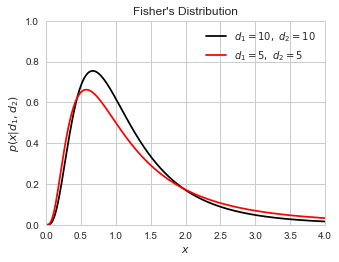

In [177]:
x = np.linspace(0, 5, 1001)[1:]

fig, ax = plt.subplots(figsize=(5, 3.75))
   
dist_1 = fisher_f(10, 10.20, 0)
dist_2 = fisher_f(10, 5.15, 0)

plt.plot(x, dist_1.pdf(x), ls='-', c='black',
             label=r'$d_1=%i,\ d_2=%i$' % (10.20, 10.20))

plt.plot(x, dist_2.pdf(x), ls='-', c='red',
             label=r'$d_1=%i,\ d_2=%i$' % (5.15, 5.15))

plt.xlim(0, 4)
plt.ylim(0.0, 1.0)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|d_1, d_2)$')
plt.title("Fisher's Distribution")

plt.legend()
plt.show()

### Hypotheses

$$\left.\begin{array} { l } { H _ { 0: } \sigma _ { 1} ^ { 2} = \sigma _ { 2} ^ { 2} } \\ { H _ { 1} \sigma _ { 1} ^ { 2} \neq \sigma _ { 2} ^ { 2} } \end{array} \right.$$

Significance Level: $\alpha = .05$ 

In [178]:
alpha = 0.05

### Test Statistik

Two variance estimates are involved. 
In addition F cannot have negative values.

$$F = \frac { \operatorname{larger} s ^ { 2} } { \text{ smaller } s ^ { 2} }$$

### Dataset: Study times (h) of female and male students

In [179]:
female = np.array([26, 25, 43, 34, 18, 52])
male = np.array([23, 30, 18, 25, 28, 20])
df = pd.DataFrame({'female': female, 'male':male})

In [180]:
female_study_time_mean = df['female'].mean()
female_study_time_var = df['female'].var(ddof=1)
male_study_time_mean = df['male'].mean()
male_study_time_var = df['male'].var(ddof=1)

In [181]:
F = max(female_study_time_var, male_study_time_var) / min(female_study_time_var, male_study_time_var)
F

7.547169811320755

In [182]:
df1 = female.size - 1
df2 = male.size - 1

In [183]:
p_value = 1 - stats.f.cdf(F, df1, df2)
p_value

0.022320917188461298

### Interpretation

In [184]:
if p_value > alpha:
    print('Null Hypothesis cannot be rejected.')
else:
    print('Null Hypothesis can be rejected.')

Null Hypothesis can be rejected.


### Visualisation

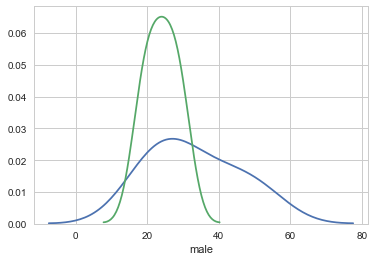

In [185]:
sns.distplot(df['female'], hist=False, rug=False)
sns.distplot(df['male'], hist=False, rug=False)

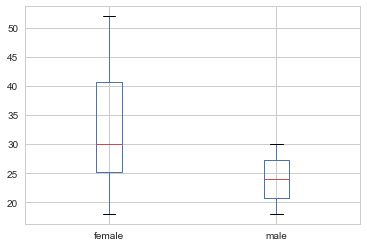

In [186]:
df.boxplot()